In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import numpy as np
from astropy.table import Table
from astropy.io import fits
import tools

%matplotlib inline
font_prop = font_manager.FontProperties(size=20)

In [3]:
obsID = "95409-01-15-06"
in_file = "/Users/abigailstevens/Reduced_data/GX339-BQPO/"+obsID+"/GTId_eventlist.fits"
try:
    fits_hdu = fits.open(in_file)
    time = fits_hdu[1].data.field('TIME')  ## Data is in ext 1
    channel = fits_hdu[1].data.field('CHANNEL')
    pcuid = fits_hdu[1].data.field('PCUID')
    fits_hdu.close()
except IOError:
    print("\tERROR: File does not exist: %s" % in_file)
    exit()
PCU2_mask = pcuid != 2
time_ref = time[PCU2_mask]
chan_ref = channel[PCU2_mask]

In [4]:
start_time = 514597152.785655021667480
end_time = 514597214.254405021667480
seg_num_per_obsid = 1
dt = 4
n_bins = 16
extra_bins = 10

pre_and_post = extra_bins * dt
seg_start = start_time-pre_and_post
seg_end = end_time+pre_and_post
time_mask = (time_ref > seg_start) & (time_ref < seg_end)
time_seg = time_ref[time_mask]
chan_seg = chan_ref[time_mask]
seg_rate_lc = tools.make_1Dlightcurve(time_seg, n_bins+(2*extra_bins), seg_start, seg_end)
t_bin_seq = np.linspace(seg_start, seg_end, num=n_bins+(2*extra_bins))

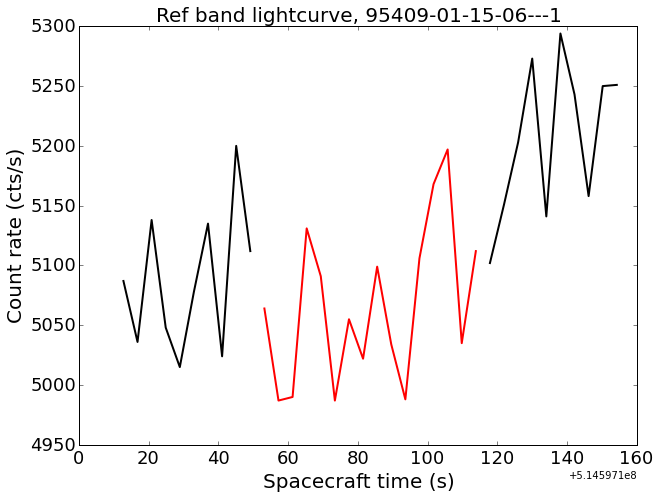

In [6]:
fig, ax = plt.subplots(1,1, figsize=(10,7.5))
ax.plot(t_bin_seq[0:extra_bins], seg_rate_lc[0:extra_bins], lw=2, c='k')
ax.plot(t_bin_seq[extra_bins:-extra_bins], seg_rate_lc[extra_bins:-extra_bins], lw=2, c='r')
ax.plot(t_bin_seq[-extra_bins:], seg_rate_lc[-extra_bins:], lw=2, c='k')
ax.set_xlabel('Spacecraft time (s)', fontproperties=font_prop)
ax.set_ylabel('Count rate (cts/s)', fontproperties=font_prop)
ax.tick_params(axis='x', labelsize=18, bottom=True, top=True, \
    labelbottom=True, labeltop=False)
ax.tick_params(axis='y', labelsize=18, left=True, right=True, \
    labelleft=True, labelright=False)
title="Ref band lightcurve, %s---%d" % (obsID, seg_num_per_obsid)
plt.title(title, fontproperties=font_prop)
save_as = "./lightcurve_%s---%d.png" % (obsID, seg_num_per_obsid)
plt.savefig(save_as)
plt.show()